# [Деревья решений](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9)

In [1]:
from IPython.display import Image
import graphviz 
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline 

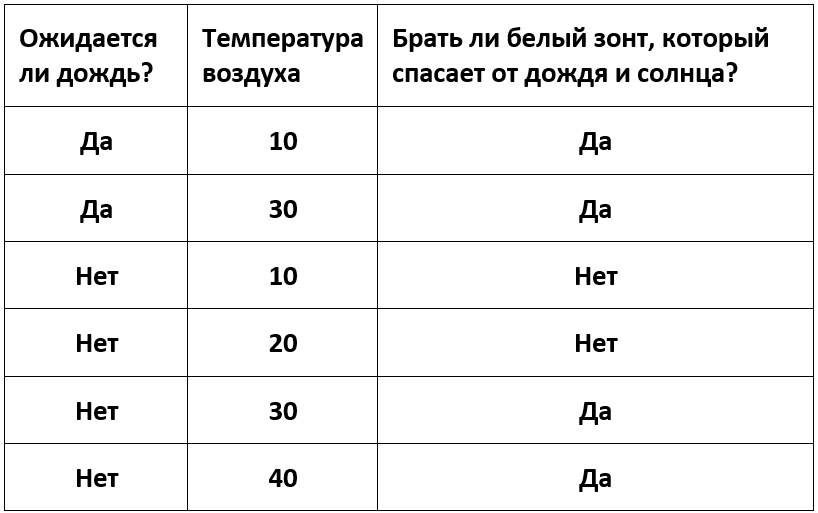

In [2]:
Image("img/dt.png", width="500")

## Метрические и логические методы обучения с учителем

- Метрические методы основаны на построении многомерного пространства числовых признаков, введении метрики в этом пространстве и поиска решения на основе метрики. Классическим примером является KNN. При использовании метрических методов фактически отказываются от специфики предметной области, все признаки превращаются в числовые. Метрические методы, как правило, используют принцип "черного ящика", не поясняют найденное решение в терминах предметной области.

- В противоположность им, логические методы опираются на понятия предметной области. Используется принцип "белого ящика", решение может быть интерпретировано в терминах предметной области. Результатом обучения логического метода  является решение в виде набора правил (формат правил зависит от используемого метода). На этапе предсказания данные тестовой выборки подставляются в сформированные правила, предсказание формируется на основе правил.  


Одним из наиболее простых примеров логических методов являются [решающие списки.](https://en.wikipedia.org/wiki/Decision_list)

Фактически, на этапе обучения, на основе обучающей выборки составляется "программа" обработки данных обучающей выборки. Проверяемые в этой программе переменные соответствуют признакам (полям) анализируемых данных.

На этапе предсказания в сформированную программу подставляются данные тестовой выборки.

Нельзя не отметить близость логических методов обучения с учителем к алгоритмам, используемым в экспертных системах, в частности, к алгоритму [RETE.](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_Rete) Необходимо только учитывать, что алгоритмы экспертных систем не предсказывают целевой признак, а изменяют исходные переменные.

Проверки в решающем списке можно преобразовать в иерархию проверок для отдельных признаков. Это уменьшит временную сложность алгоритма и сделает предсказание более надежным (улучшит обобщающую способность алгоритма). И тогда получится алгоритм обучающего дерева.

## Математические и алгоритмические основы деревьев решений

### Основной алгоритм построения дерева решения

Фактически, алгоритм построения обучающего дерева сводится к нескольким пунктам:

1. Для текущего выбранного признака (колонки) из N признаков построить все варианты ветвления по значениям (для категориальных признаков) или по диапазонам значений (для числовых признаков). При этом будет сформировано K поддеревьев (где K - число ветвлений). Каждое поддерево содержит подвыборку, которая включает только строки выборки, соответствующие результатам ветвления. В каждом поддереве расположена выборка, содержащая N-1 признак, один призак пропадает в результате ветвления.
1. Если подвыборке соответствует единственное значение целевого признака, то в дерево добавляется терминальный лист, который соответствует предсказанному значению.
1. Если в подвыборке больше одного значения целевого признака, то предыдущие пункты выполняются рекурсивно для подвыборки.

Рассмотрим пример:

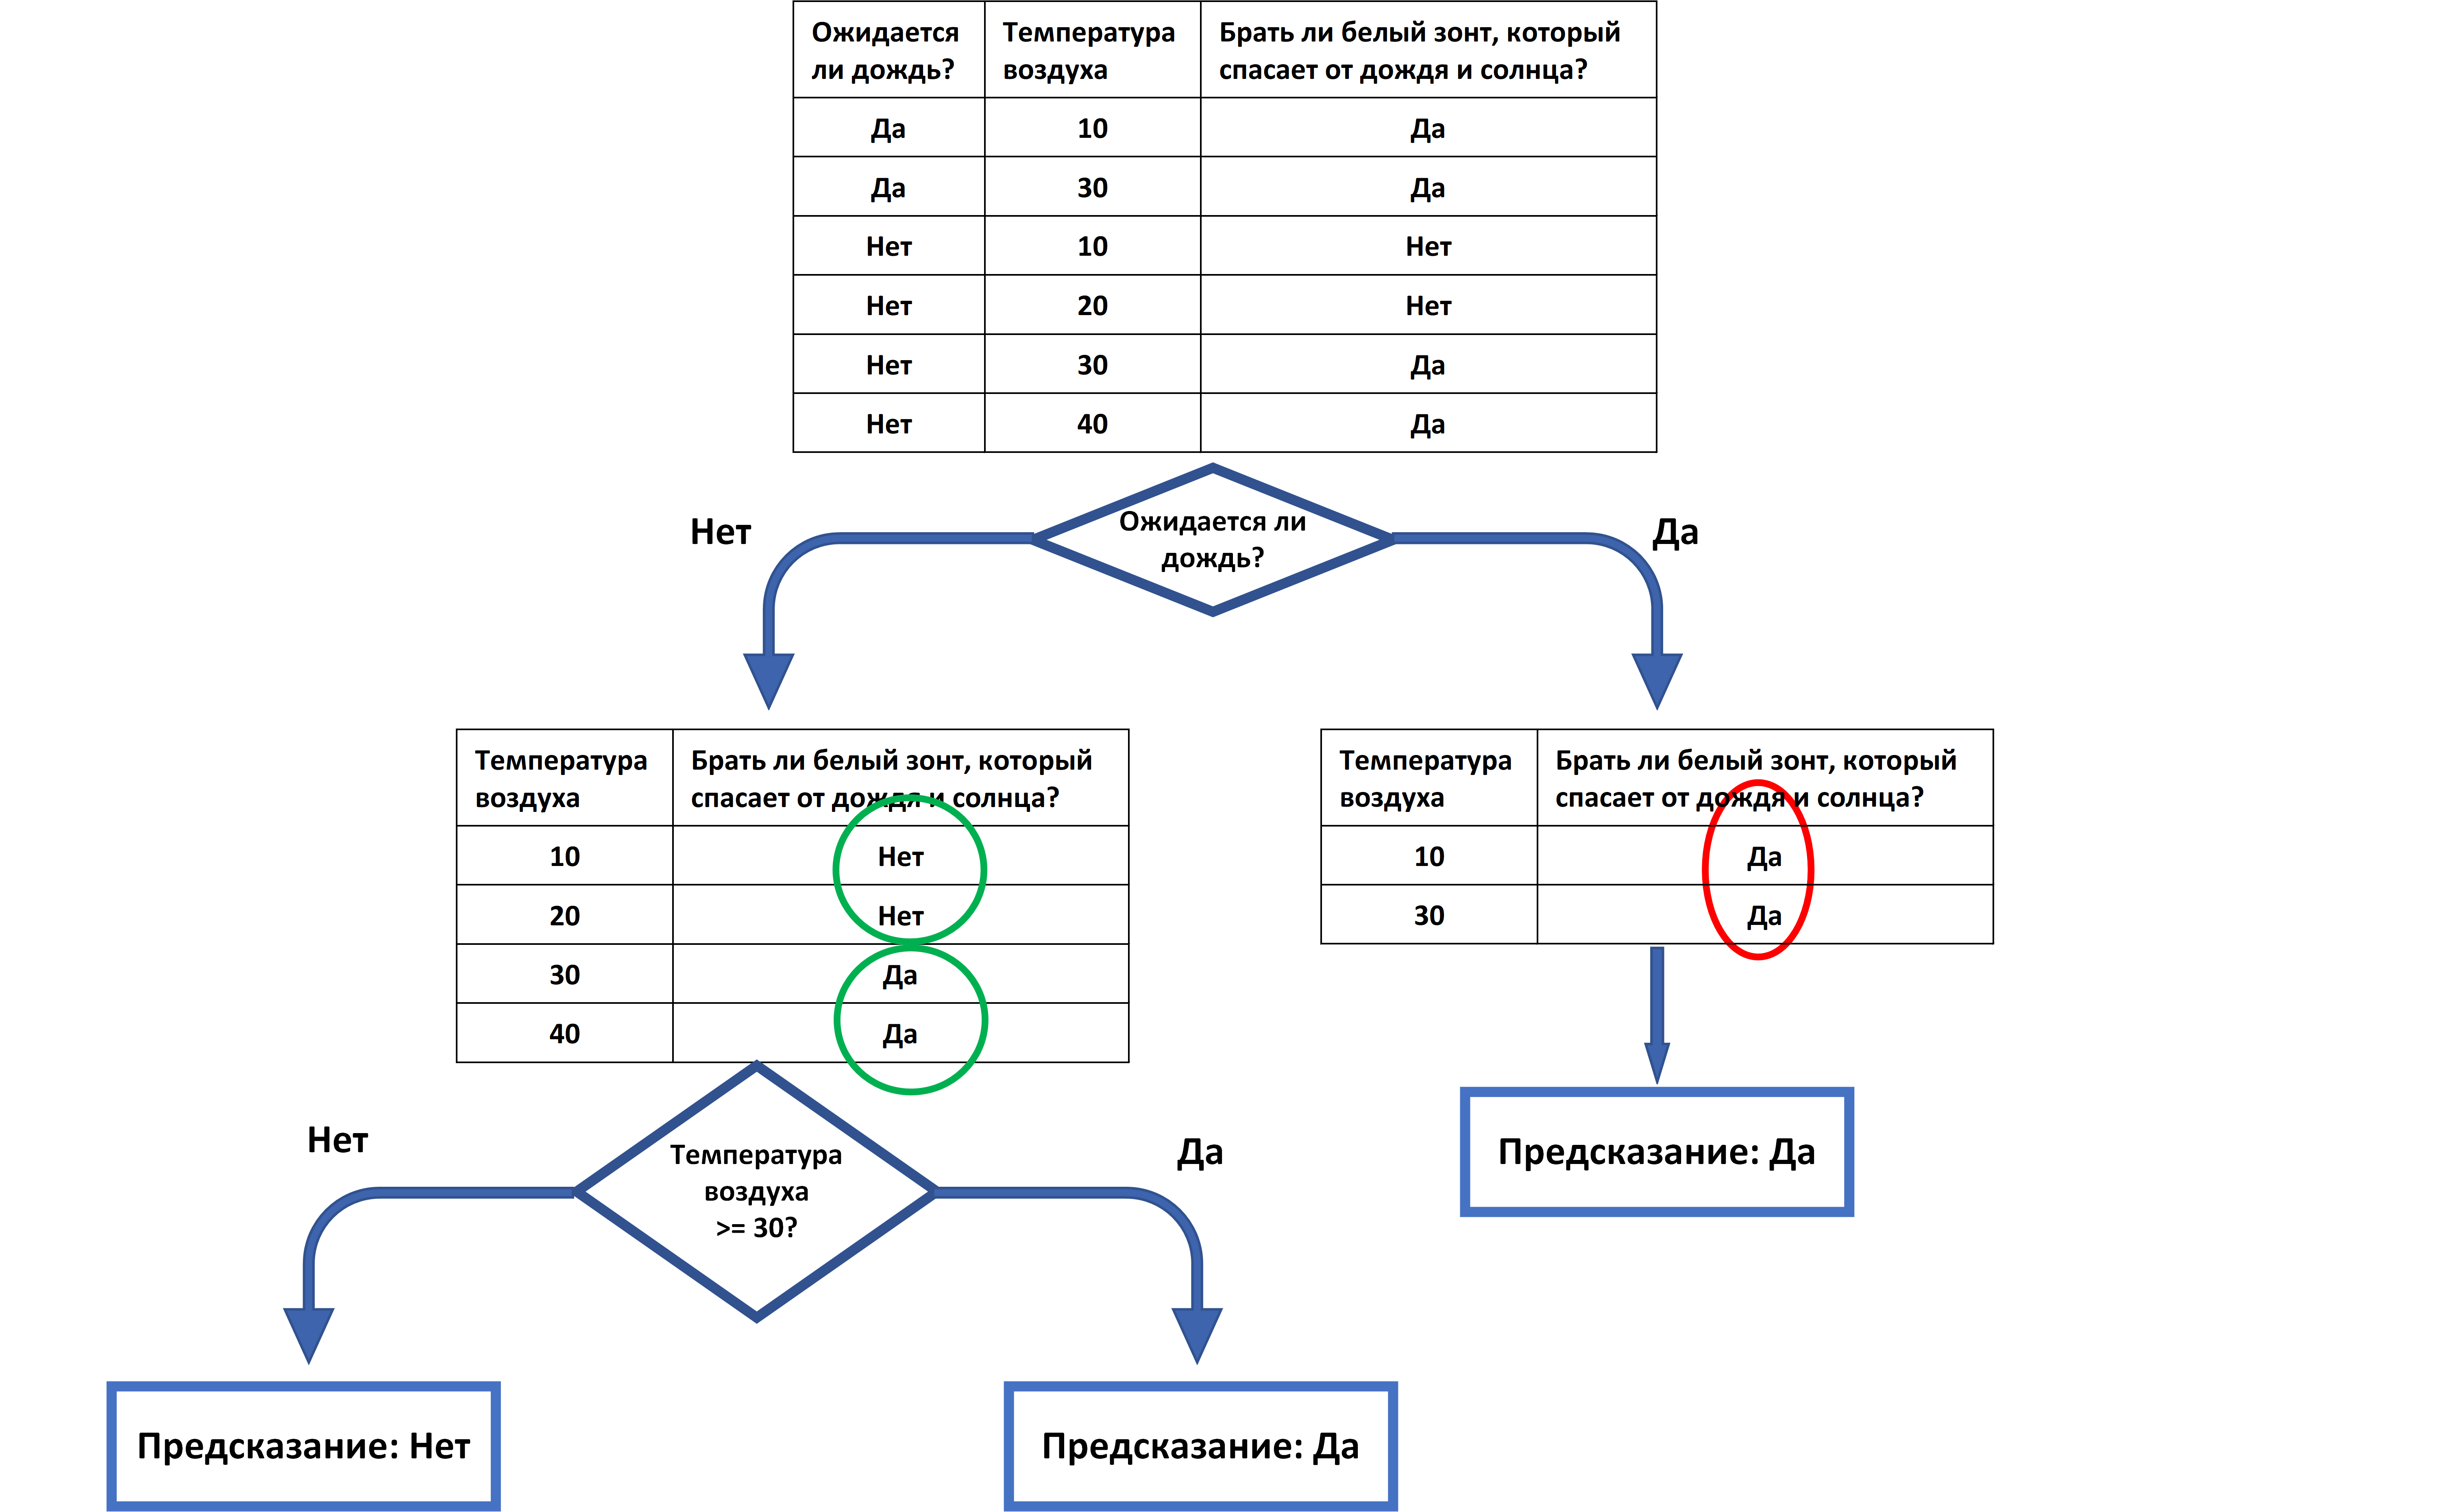

In [3]:
Image("img/dt_tree.png", width="1000")

### Выбор текущего признака

Основной вопрос состоит в том, как выбирать текущий признак. Признак нужно выбирать таким образом, чтобы число проверок было минимально.

В случае решения задачи классификации для проверки используются:
- [Мера неопределенности Джини (Gini impurity)](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

- [Энтропийные критерии](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D1%8F) 

Меру неопределенности Джини не следует путать с [коэффициентом Джини](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%94%D0%B6%D0%B8%D0%BD%D0%B8) который является макроэкономическим показателем.

В случае решения задачи регрессии для проверки используются стандартные регрессионные метрики - MAE, MSE.

[Существующие реализации алгоритмов деревьев решений.](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9#%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%B0)

В библиотеке scikit-learn реализован алгоритм CART.

### Расчет меры неопределенности Джини для выбора текущего признака

Слово "impurity" можно также переводить как "загрязненность". Если узел дерева содержит единственное значение целевого признака, то он "чист", Gini impurity = 0. 

Если узел дерева содержит несколько значений целевого признака, то значение Gini impurity > 0. Чем ближе значение Gini impurity к нулю, тем лучше.

1. Вначале необходимо рассчитать Gini impurity для всего набора данных.

Это мера того, как часто случайно выбранный элемент будет некорректно классифицирован:

$$ G = \sum\limits_{i=1}^C p_i \sum\limits_{i \ne k} p_k = \sum\limits_{i=1}^C p_i(1-p_i) = \sum\limits_{i=1}^C (p_i-p_i^2) = \sum\limits_{i=1}^C p_i - \sum\limits_{i=1}^C p_i^2 = 1 - \sum\limits_{i=1}^C p_i^2, $$

где:

- $C$ - количество классов;
- $p_i$ - вероятность i-го значения целевого признака, отношение количества записей с целевым признаком i к общему количеству записей.


2. Далее необходимо рассчитать Gini impurity для новых выборок, которые получаются в результате разделения. Если произошло бинарное разделение на левую (L) и правую (R) ветви, и N - количество записей, то текущий остаток :

$$ G_{rem} = G_L N_L + G_R N_R $$

Или для случая j разделений:

$$ G_{rem} = \sum\limits_{j} G_j N_j $$

3. Далее расчитывается Gini gain: 

$$ G_{gain} = G - G_{rem} $$

Чем больше $G_{gain}$, тем лучше разделение.

Пункты 1-3 необходимо повторить для каждого признака и выбрать для разделения признак с лучшим значением $G_{gain}$.

Рассчитаем коэффициент Джини для первого разделения нашего набора данных по признаку "Ожидается ли дождь?":

$$p_{Да} = 4/6$$
$$p_{Нет} = 2/6$$

$$ G = 1 - ((4/6)^2 + (2/6)^2) = 0,444 $$

Расчитаем значения для правой ветви:

$$ G_{Да} = 1 - ((2/2)^2 + (0)^2) = 0 $$

Расчитаем значения для левой ветви:

$$ G_{Нет} = 1 - ((2/4)^2 + (2/4)^2) = 0,5 $$

$$N_{Да} = 1/3 $$
$$N_{Нет} = 2/3 $$

$$ G_{rem} = G_{Да} \cdot N_{Да} + G_{Нет} \cdot N_{Нет} = 0 \cdot 1/3 + 0,5 \cdot 2/3 = 0,333 $$

$$ G_{gain} = G - G_{rem} = 0,444 - 0,333 = 0,111 $$

Такие расчеты необходимо было бы проверсти для каждого признака и выбрать для разделения признак, которому соответствует максимальный $G_{gain}$.

### Работа с пропусками

Для предсказания данных, содержащих пропущенные значения, в деревьях решений используется следующий подход:

- Когда достигается узел дерева, содержащий проверку пропущенного значения, то поиск продолжается независимо по всем ветвям дерева вниз. Получается несколько предсказаний.
- В хорошем случае предсказания могут совпасть.
- В противном случае оценивается количество записей обучающей выборки, которое поддерживает данное предсказание. Выбирается предсказание с наибольшим количеством записей.

**Текущая версия библиотеки scikit-learn не поддерживает работу с пропусками. Пропущенные значения необходимо предварительно заполнять вручную.**

### Преимущества деревьев решений:
- Работают по принципу "белого ящика". Логика построенного дерева хорошо отображается на исследуемую предметную область. 
- Можно визуализировать алгоритм в виде дерева.
- Требуют мало данных для обучения.
- Работает с числовыми и категориальными признаками. **В настоящее время scikit-learn требует кодирования категориальных признаков с использованием LabelEncoder.**

### Недостатки деревьев решений:
- Могут переобучаться. Для борьбы с переобучением используется [регулирование глубины дерева](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9#%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%B8%D0%BD%D1%8B_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%B0) или "cтрижка" дерева. Англ. [decision_tree_pruning.](https://en.wikipedia.org/wiki/Decision_tree_pruning)
- Очень сильно зависят от набора данных в обучающей выборке. Появление одного нового примера может полностью перестроить весь каскад условий. На этом недостатке построено использование дерева в ансамблевых классификаторах, поэтому данный недостаток можно рассматривать как достоинство.

## [Реализация деревьев решений в библиотеке scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

In [4]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

### Решение задачи классификации

Для решения задачи классификации используется класс [DecisionTreeClassifier.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [5]:
# Используем датасеты для классификации
iris = load_iris()
wine = load_wine()
iris_x_ds = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_x_ds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()    
    

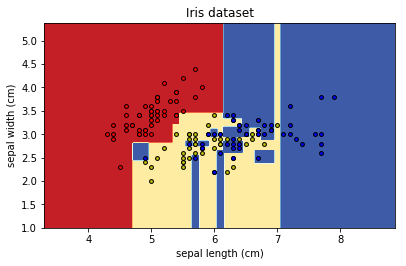

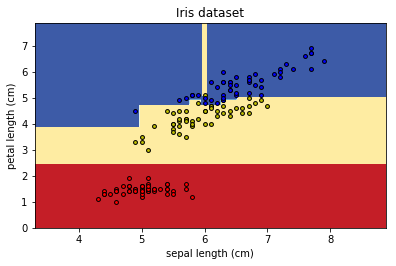

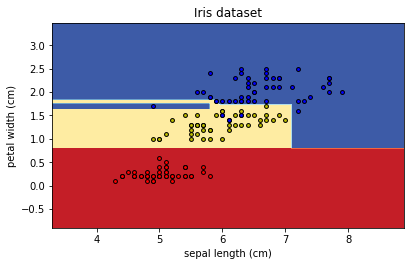

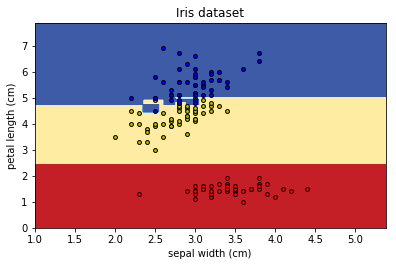

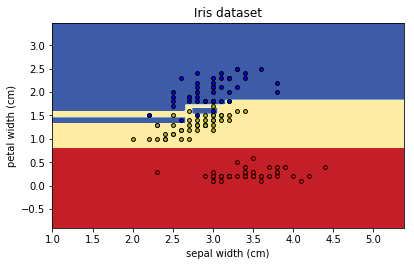

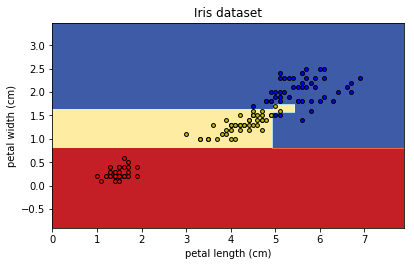

In [7]:
plot_tree_classification('Iris dataset', iris)

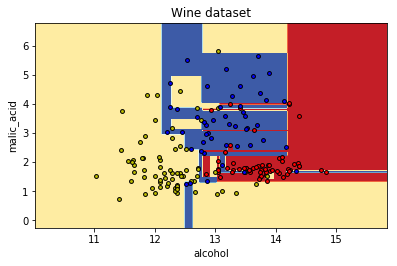

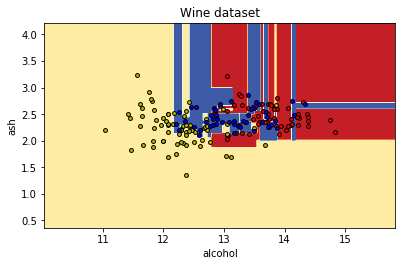

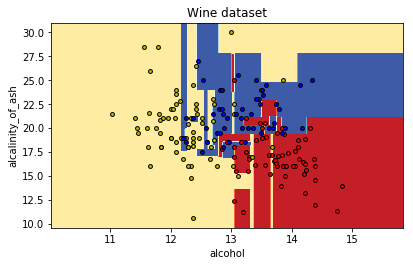

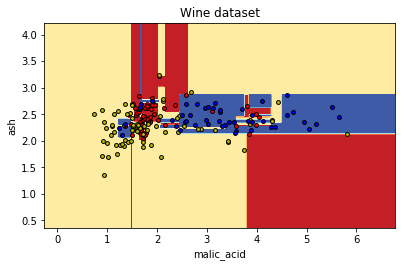

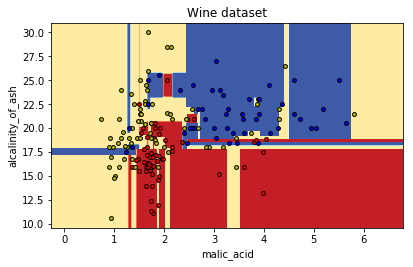

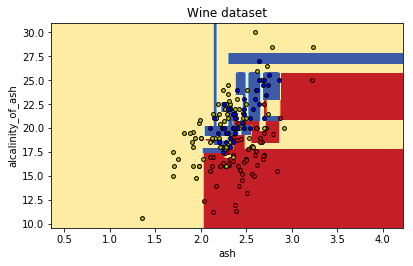

In [8]:
plot_tree_classification('Wine dataset', wine)

In [9]:
# Обучим дерево на всех признаках iris
iris_tree_cl = DecisionTreeClassifier(random_state=1)
iris_tree_cl.fit(iris_x_ds, iris.target)
iris_tree_cl

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Пример визуализации дерева

Для визуализации необходимо :
1. установить на компьютер программную библиотеку [Graphviz](https://ru.wikipedia.org/wiki/Graphviz)
1. установить питоновский пакет graphviz - "conda install python-graphviz"

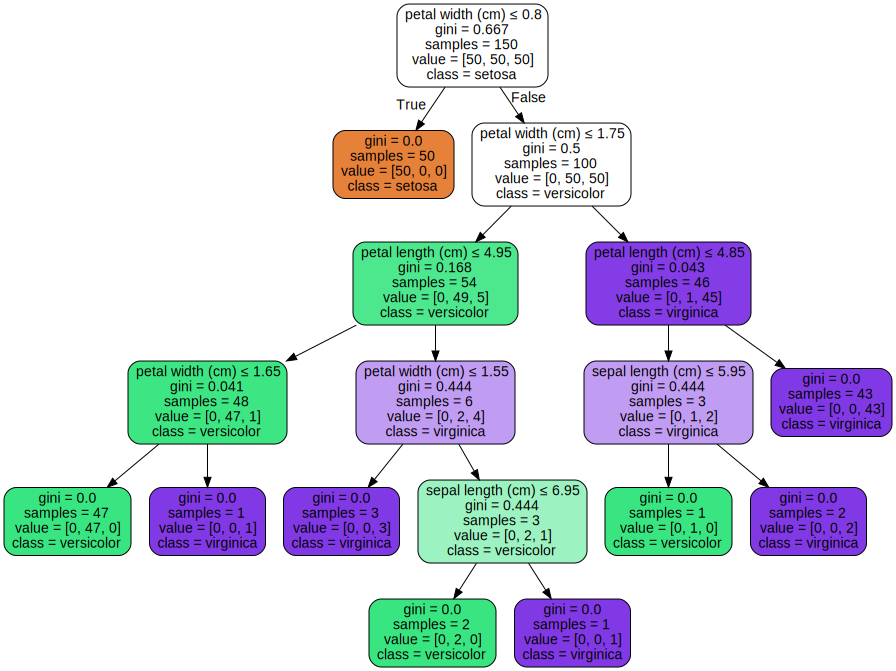

In [10]:
dot_data = export_graphviz(iris_tree_cl, out_file=None, 
                           feature_names=iris.feature_names, 
                           class_names=iris.target_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [11]:
# Важность признаков
list(zip(iris_x_ds.columns.values, iris_tree_cl.feature_importances_))

[('sepal length (cm)', 0.026666666666666658),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.05072262479871173),
 ('petal width (cm)', 0.9226107085346216)]

In [12]:
# Важность признаков в сумме дает единицу
sum(iris_tree_cl.feature_importances_)

1.0

In [13]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(15,7)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

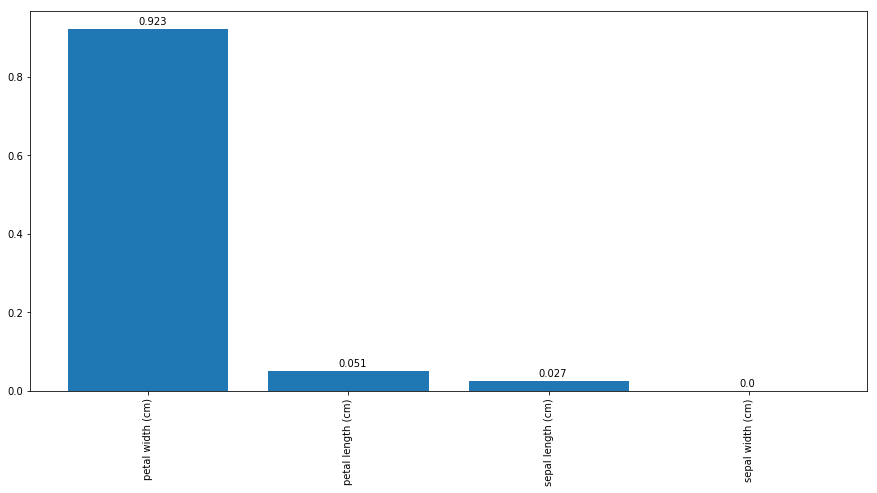

In [14]:
iris_tree_cl_fl, iris_tree_cl_fd = draw_feature_importances(iris_tree_cl, iris_x_ds)

In [15]:
iris_x_ds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# Пересортируем признаки на основе важности
iris_x_ds_sorted = iris_x_ds[iris_tree_cl_fl]
iris_x_ds_sorted.head()

,petal width (cm),petal length (cm),sepal length (cm),sepal width (cm)
0,0.2,1.4,5.1,3.5
1,0.2,1.4,4.9,3.0
2,0.2,1.3,4.7,3.2
3,0.2,1.5,4.6,3.1
4,0.2,1.4,5.0,3.6


In [17]:
# Разделим выборку на обучающую и тестовую
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_x_ds_sorted, iris.target, test_size=0.5, random_state=1)
iris_X_train.shape, iris_X_test.shape

((75, 4), (75, 4))

In [18]:
# Обучим дерево и предскажем результаты на всех признаках 
iris_tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(iris_X_train, iris_y_train)
iris_y_test_predict = iris_tree_cl_feat_1.predict(iris_X_test)
iris_y_test_predict.shape

(75,)

In [19]:
# Проверим точность по классам
print_accuracy_score_for_classes(iris_y_test, iris_y_test_predict)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7777777777777778


In [20]:
# Обучим дерево и предскажем результаты на самых важных признаках 
iris_tree_cl_feat_2 = DecisionTreeClassifier(random_state=1).fit(iris_X_train[[iris_tree_cl_fl[0]]], iris_y_train)
iris_y_test_predict_2 = iris_tree_cl_feat_2.predict(iris_X_test[[iris_tree_cl_fl[0]]])
iris_y_test_predict_2.shape

(75,)

In [21]:
# Проверим точность по классам
print_accuracy_score_for_classes(iris_y_test, iris_y_test_predict_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9583333333333334
2 	 0.9629629629629629


### Решение задачи регрессии

Для решения задачи регрессии используется класс [DecisionTreeRegressor.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [22]:
def random_dataset_for_regression():
    """
    Создание случайного набора данных для регрессии
    """
    rng = np.random.RandomState(1)
    X_train = np.sort(5 * rng.rand(80, 1), axis=0)
    y_train = np.sin(X_train).ravel()
    y_train[::5] += 3 * (0.5 - rng.rand(16))
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    return X_train, y_train, X_test

In [23]:
def plot_tree_regression(X_train, y_train, X_test):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """

    # Обучение регрессионной модели
    regr_1 = DecisionTreeRegressor(max_depth=3)
    regr_2 = DecisionTreeRegressor(max_depth=10)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)

    # Предсказание
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Вывод графика
    fig, ax = plt.subplots(figsize=(15,7))
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="Данные")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=3", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
    plt.xlabel("Данные")
    plt.ylabel("Целевой признак")
    plt.title("Регрессия на основе дерева решений")
    plt.legend()
    plt.show()

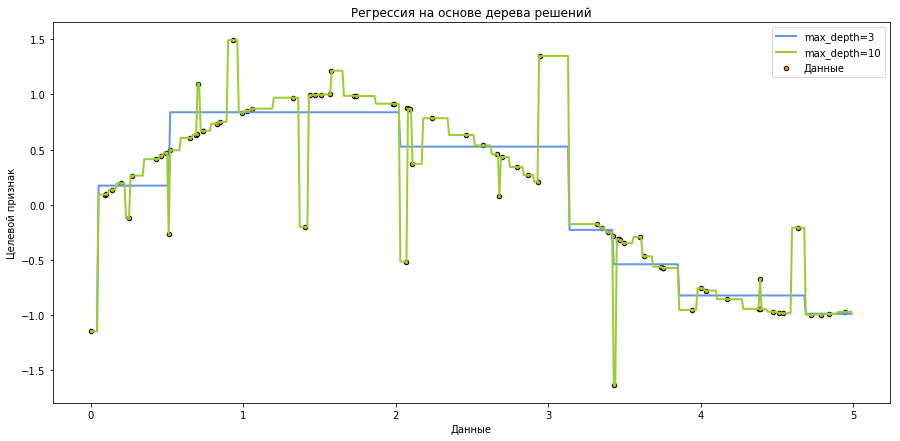

In [24]:
X_train, y_train, X_test = random_dataset_for_regression()
plot_tree_regression(X_train, y_train, X_test)

In [25]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# Обучим дерево на всех признаках boston
boston_tree_regr = DecisionTreeRegressor(random_state=1)
boston_tree_regr.fit(df_boston, boston.target)
boston_tree_regr

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

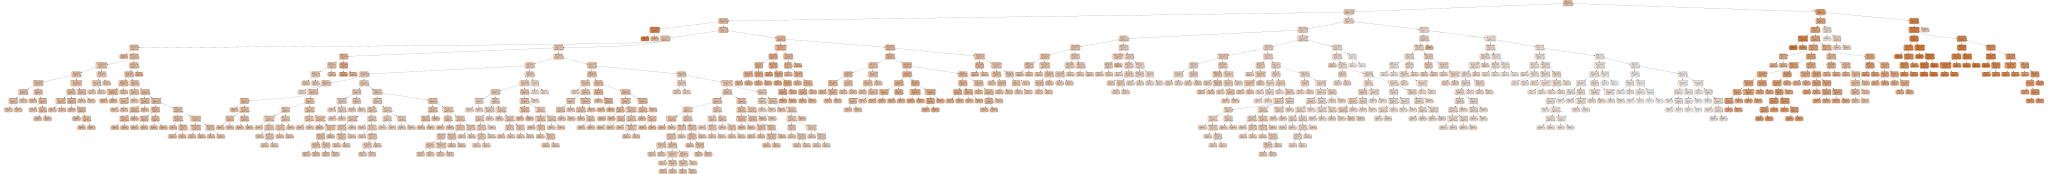

In [27]:
dot_data = export_graphviz(boston_tree_regr, out_file=None, 
                           feature_names=boston.feature_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [28]:
sum(boston_tree_regr.feature_importances_)

1.0

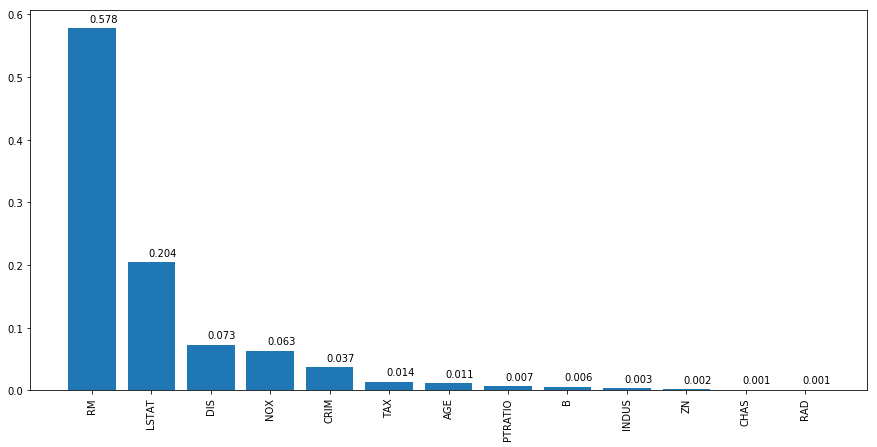

In [29]:
boston_tree_regr_fl, boston_tree_regr_fd = draw_feature_importances(boston_tree_regr, df_boston)

In [30]:
boston_tree_regr_fl[0:5]

['RM', 'LSTAT', 'DIS', 'NOX', 'CRIM']

In [31]:
sum(boston_tree_regr_fd[0:5])

0.9555636308606557

In [32]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
# Пересортируем признаки на основе важности
df_boston_sorted = df_boston[boston_tree_regr_fl]
df_boston_sorted.head()

,RM,LSTAT,DIS,NOX,CRIM,TAX,AGE,PTRATIO,B,INDUS,ZN,CHAS,RAD
0,6.575,4.98,4.0900,0.538,0.00632,296.0,65.2,15.3,396.90,2.31,18.0,0.0,1.0
1,6.421,9.14,4.9671,0.469,0.02731,242.0,78.9,17.8,396.90,7.07,0.0,0.0,2.0
2,7.185,4.03,4.9671,0.469,0.02729,242.0,61.1,17.8,392.83,7.07,0.0,0.0,2.0
3,6.998,2.94,6.0622,0.458,0.03237,222.0,45.8,18.7,394.63,2.18,0.0,0.0,3.0
4,7.147,5.33,6.0622,0.458,0.06905,222.0,54.2,18.7,396.90,2.18,0.0,0.0,3.0


In [34]:
# Разделение данных на обучающую и тестовую выборки
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    df_boston_sorted, boston.target, test_size=0.3, random_state=1)

In [35]:
boston_X_train.shape, boston_X_test.shape

((354, 13), (152, 13))

In [36]:
# Обучим дерево и предскажем результаты на всех признаках 
boston_tree_regr_feat_1 = DecisionTreeRegressor(random_state=1).fit(boston_X_train, boston_y_train)
boston_y_test_predict = boston_tree_regr_feat_1.predict(boston_X_test)
boston_y_test_predict.shape

(152,)

In [37]:
mean_absolute_error(boston_y_test, boston_y_test_predict)

2.9460526315789473

In [38]:
# Обучим дерево и предскажем результаты на лучших признаках 
boston_tree_regr_feat_2 = DecisionTreeRegressor(random_state=1).fit(
    boston_X_train[boston_tree_regr_fl[0:5]], boston_y_train)
boston_y_test_predict_2 = boston_tree_regr_feat_2.predict(boston_X_test[boston_tree_regr_fl[0:5]])
boston_y_test_predict_2.shape

(152,)

In [39]:
# Ошибка стала меньше
mean_absolute_error(boston_y_test, boston_y_test_predict_2)

2.8065789473684206

In [40]:
# Исследуем, как изменяется ошибка при добавлении признаков в порядке значимости
boston_X_range = list(range(1, len(boston_X_train.columns)+1))
boston_X_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [41]:
mae_list = []
for i in boston_X_range:
    # Обучим дерево и предскажем результаты на заданном количестве признаков 
    boston_tree_regr_feat_3 = DecisionTreeRegressor(random_state=1).fit(
        boston_X_train[boston_tree_regr_fl[0:i]], boston_y_train)
    boston_y_test_predict_3 = boston_tree_regr_feat_3.predict(boston_X_test[boston_tree_regr_fl[0:i]])
    temp_mae = mean_absolute_error(boston_y_test, boston_y_test_predict_3)
    mae_list.append(temp_mae)

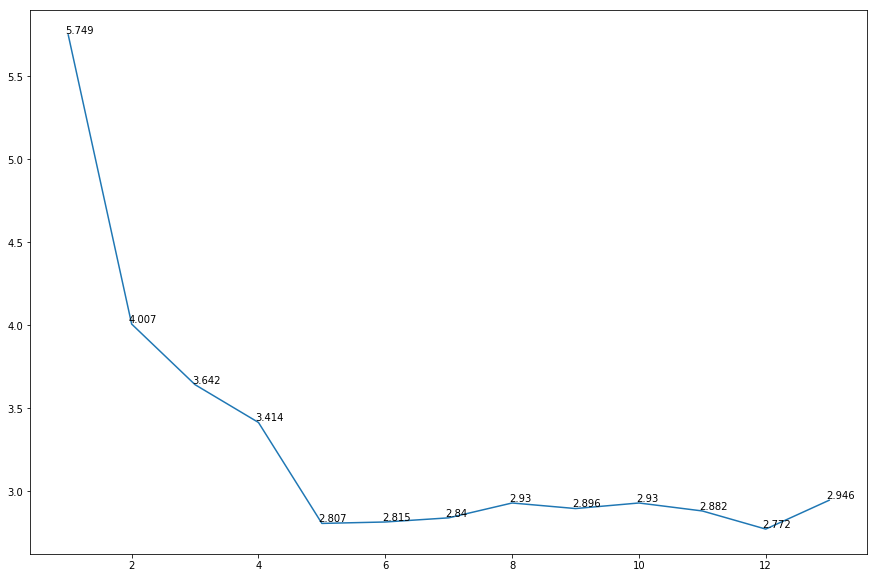

In [42]:
plt.subplots(figsize=(15,10))
plt.plot(boston_X_range, mae_list)
for a,b in zip(boston_X_range, mae_list):
    plt.text(a-0.05, b+0.01, str(round(b,3)))
plt.show()

## Дополнительные источники

- [Деревья решений — общие принципы работы](https://basegroup.ru/community/articles/description)
- [Текст лекции профессора К.В. Воронцова](http://www.machinelearning.ru/wiki/images/3/3e/Voron-ML-Logic.pdf)
- [Презентация к лекции](http://www.machinelearning.ru/wiki/images/9/97/Voron-ML-Logic-slides.pdf) профессора К.В. Воронцова
- [Открытый курс машинного обучения. Лекция по деревьям решений](https://habr.com/ru/company/ods/blog/322534/)